In [ ]:
from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)

In [1]:
for train_index, test_index in kf.split(X):
 print(“TRAIN:”, train_index, “TEST:”, test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))

SyntaxError: invalid character in identifier (<ipython-input-1-3a5ab08e0c38>, line 2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from math import sqrt



In [2]:
from haversine import haversine

In [3]:
df = pd.read_csv('house_data_cleaned.csv')


In [8]:
top_20_zips_seattle_area = [98072, 98027, 98119,98029,98052, 98005, 98117,98065, 98105,98119,98006, 98121, 98053,98074,98033,98075,98112,98004,98040,98039]
top_20_zips_seattle_area

[98072,
 98027,
 98119,
 98029,
 98052,
 98005,
 98117,
 98065,
 98105,
 98119,
 98006,
 98121,
 98053,
 98074,
 98033,
 98075,
 98112,
 98004,
 98040,
 98039]

In [6]:
df_zip_dums = pd.get_dummies(df['zipcode'])
df = pd.concat([df, df_zip_dums], axis=1)
df.head().T

,0,1,2,3,4
id,7129300520,6414100192,5631500400,2487200875,1954400510
date,2014-10-13,2014-12-09,2015-02-25,2014-12-09,2015-02-18
price,221900,538000,180000,604000,510000
bedrooms,3,3,2,4,3
bathrooms,1,2.25,1,3,2
sqft_living,1180,2570,770,1960,1680
sqft_lot,5650,7242,10000,5000,8080
floors,1,2,1,1,1
waterfront,0,0,0,0,0
view,0,0,0,0,0


In [23]:
df7 = df[['price','sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]

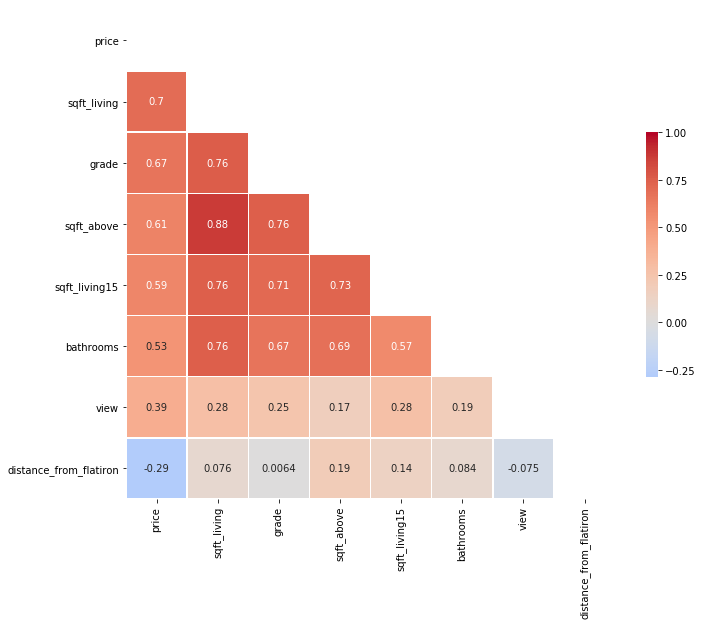

In [46]:
corr = df7.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
#There are six variations of the default theme, called deep, muted, pastel, bright, dark, and colorblind.
#cmap="PiYG"
cmap="coolwarm"
#cmap = sns.palplot(sns.dark_palette("purple"))
#cmap = sns.dark_palette("muted", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})

## lat,long tranformation into something useful
- after installing the haversine module, i want to explore how to use it to give us a distance from our building here in downtown. By doing so, it will allow us to check my hypothesis that homes closer to seattle are more expensive.

In [5]:

df['lat_long'] = tuple(zip(df.lat,df.long))


In [6]:
df['lat_long'].head()

0               (47.5112, -122.257)
1    (47.721000000000004, -122.319)
2    (47.7379, -122.23299999999999)
3    (47.5208, -122.39299999999999)
4               (47.6168, -122.045)
Name: lat_long, dtype: object

In [7]:
flatiron_latlong = [47.6092,-122.3363]
type(flatiron_latlong)

list

In [8]:
l = []
for i in df['lat_long']:
    l.append(haversine((flatiron_latlong),(i),unit = 'mi'))
l[:5]

[7.714867719017808,
 7.766476387009627,
 10.107949220477323,
 6.655340065489545,
 13.578402374482105]

In [9]:
df['distance_from_flatiron'] = pd.Series(l)


In [10]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,bed_bath_sum,renovation_yes,sqft_living_plus_lot,sqft_living_plus_lot_15,lat_long,distance_from_flatiron
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,4.00,0,6830,6990,"(47.5112, -122.257)",7.714868
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,5.25,1,9812,9329,"(47.721000000000004, -122.319)",7.766476
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,3.00,0,10770,10782,"(47.7379, -122.23299999999999)",10.107949
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,7.00,0,6960,6360,"(47.5208, -122.39299999999999)",6.655340
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,5.00,0,9760,9303,"(47.6168, -122.045)",13.578402


In [12]:
abs(df7.corr()) >.60


,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,distance_from_flatiron
price,True,True,True,True,False,False,False,False
sqft_living,True,True,True,True,True,True,False,False
grade,True,True,True,True,True,True,False,False
sqft_above,True,True,True,True,True,True,False,False
sqft_living15,False,True,True,True,True,False,False,False
bathrooms,False,True,True,True,False,True,False,False
view,False,False,False,False,False,False,True,False
distance_from_flatiron,False,False,False,False,False,False,False,True


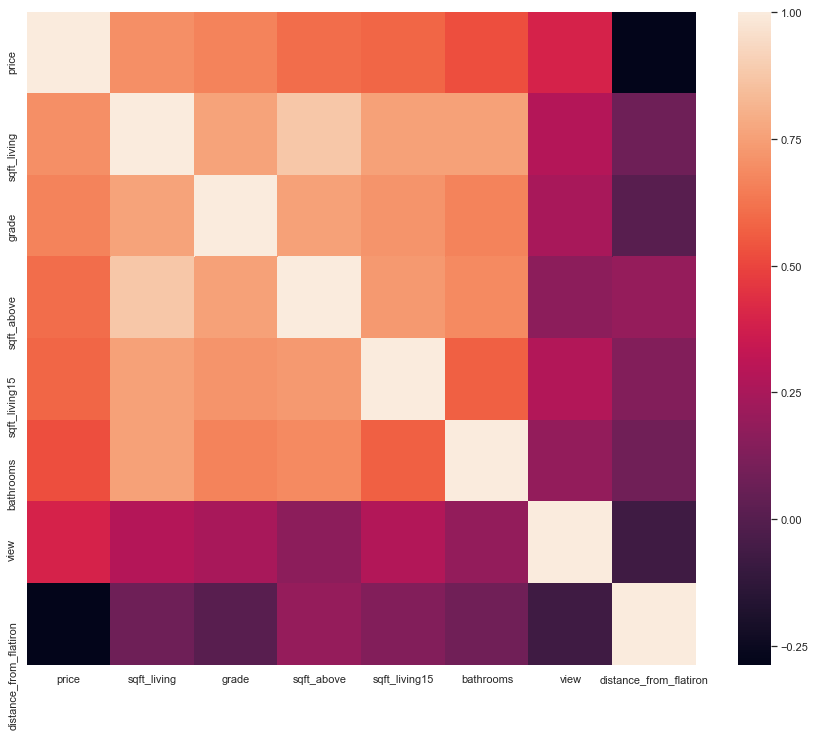

In [13]:
sns.set(rc={'figure.figsize': (15,12)})
sns.heatmap(df7.corr());

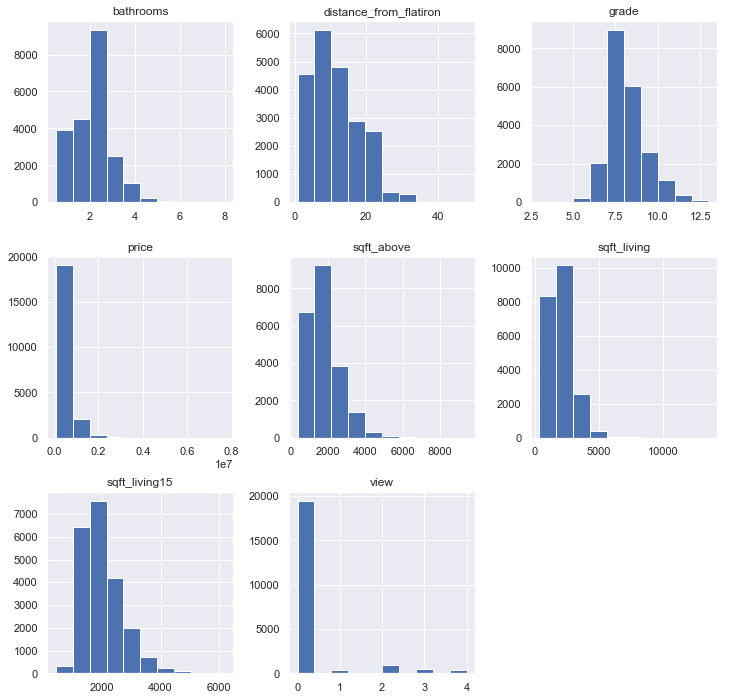

In [14]:
df7.hist(figsize=[12,12]);

/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


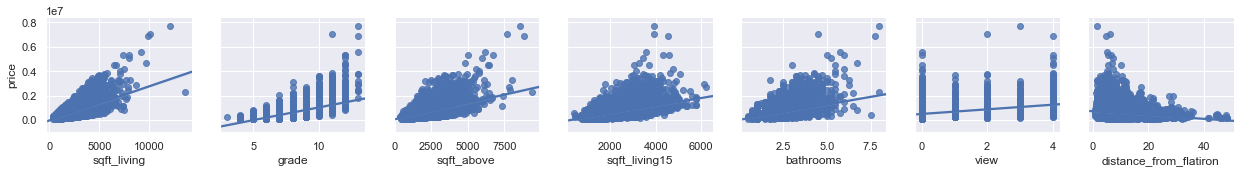

In [20]:
sns.pairplot(df7, x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron'],
             y_vars="price",kind = 'reg');

In [21]:
X1 = df7[['sqft_living', 'grade', 'sqft_living15', 'bathrooms',
       'view','distance_from_flatiron']]
y = df7['price']

In [24]:
predictors = np.asarray(X1) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model = sm.OLS(y,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     7320.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:53:40   Log-Likelihood:            -2.9540e+05
No. Observations:               21597   AIC:                         5.908e+05
Df Residuals:                   21590   BIC:                         5.909e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.952e+05   1.18e+04    -25.118      0.000   -3.18e+05   -2.72e+05
x1           182.1824      3.161     57.628      0.000     175.986     188.379
x2          7.629e+04   2072.595     36.809      0.000    7.22e+04    8.04e+04
x3            44.3336      3.459     12.817      0.000      37.554      51.114
x4         -1.481e+04   2935.085     -5.046      0.000   -2.06e+04   -9056.519
x5          7.844e+04   1981.959     39.576      0.000    7.46e+04    8.23e+04
x6         -1.753e+04    220.066    -79.643      0.000    -1.8e+04   -1.71e+04
==============================================================================
Omnibus:                    19438.718   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2182610.534
Skew:                           3.893   Prob(JB):                         0.00
Kurtosis:                      51.630   Cond. No.                     2.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
""" Now using Sklearn"""
ss = StandardScaler()

X1_scaled = ss.fit_transform(X1)

np.random.seed(33)

X1_train,X1_test,Y_train,Y_test = train_test_split(X1_scaled,y)

NameError: name 'X1' is not defined

In [20]:
lr = LinearRegression()
lr.fit(X1_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
lr.score(X1_test,Y_test) #r**2 value

0.674215535229337

In [22]:
lr.coef_

array([ 160769.50957906,   92099.30409597,   35116.938874  ,
        -13234.10106397,   56081.11364303, -117468.43898583])

In [23]:
r_2 = metrics.r2_score(Y_test, lr.predict(X1_test))
vif = 1/(1-r_2)
mae = metrics.mean_absolute_error(Y_test, lr.predict(X1_test))
mse = metrics.mean_squared_error(Y_test, lr.predict(X1_test))

In [24]:
#PRICE vs. TOP 6 BENCHMARK #test size is .25
print(f'Our list of predictors: {X1.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['sqft_living', 'grade', 'sqft_living15', 'bathrooms', 'view',
       'distance_from_flatiron'],
      dtype='object')
The R-squared score of our test is 0.674215535229337
The MAE score of our test is 132024.28339846162
The MSE score of our test is 47299654295.065
The RMSE score of our test is $217484.83693137093


## TEST with normalizing price and sqft_living

## WHY Normalize data??
- 

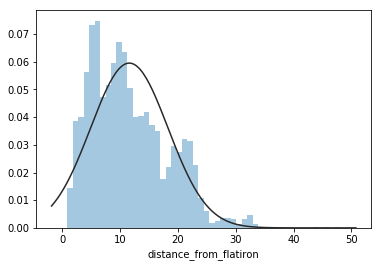

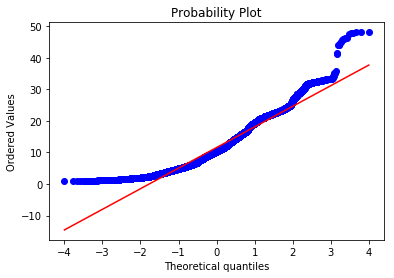

In [89]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df['distance_from_flatiron'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['distance_from_flatiron'], plot=plt)

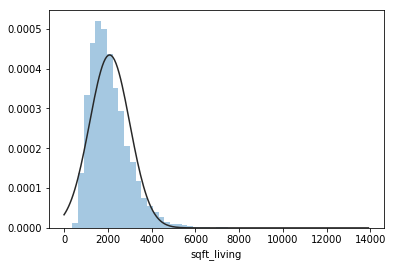

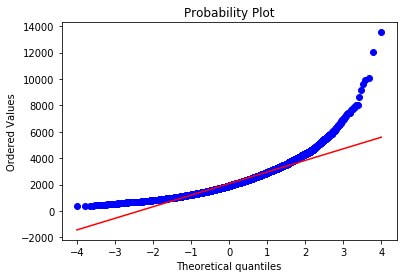

In [11]:
#histogram and normal probability plot
sns.distplot(df['sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['sqft_living'], plot=plt)

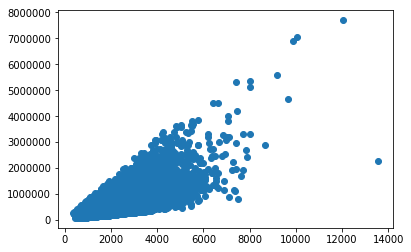

In [13]:
#scatter plot
plt.scatter(df['sqft_living'], df['price']);

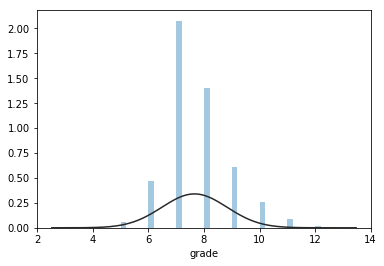

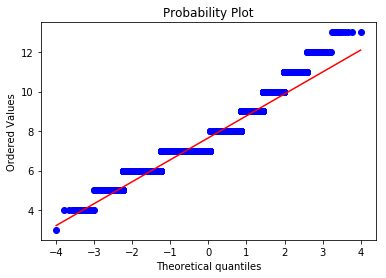

In [83]:
sns.distplot(df['grade'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['grade'], plot=plt)

## Observations of sqft_living and price
- Seems that both right skewed, and the relationship viewed in the scatter plot shows many outliers
- if we log transform both sides, it might improve the relationship!

In [16]:
#applying log transformation
df['log_price'] = np.log(df['price'])

In [17]:
df['log_sqft_living'] = np.log(df['sqft_living'])

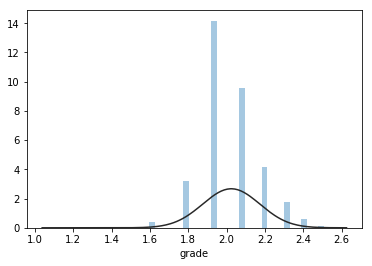

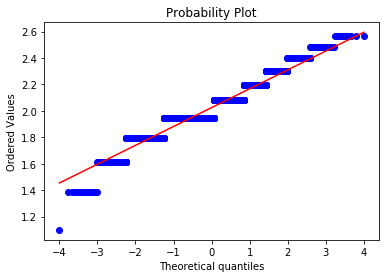

In [93]:
#transformed histogram and normal probability plot
sns.distplot(np.log(df['grade']), fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(np.log(df['grade']), plot=plt)

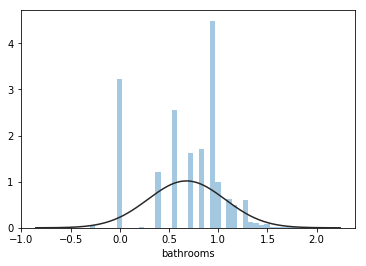

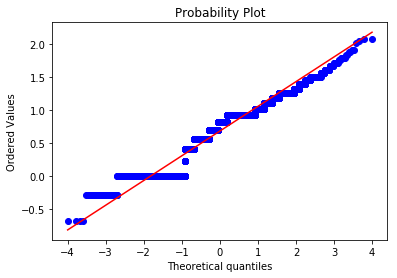

In [92]:
#transformed histogram and normal probability plot
sns.distplot(np.log(df['bathrooms']), fit=norm,  bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(np.log(df['bathrooms']), plot=plt)

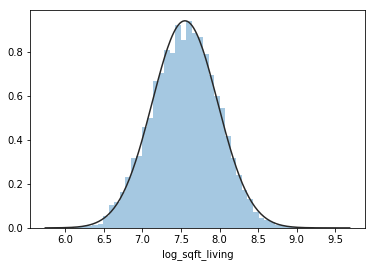

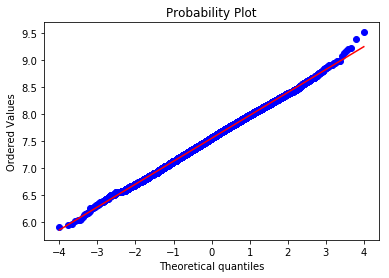

In [19]:
#transformed histogram and normal probability plot
sns.distplot(df['log_sqft_living'], fit=norm, bins=50, kde=False);
fig = plt.figure()
res = stats.probplot(df['log_sqft_living'], plot=plt)

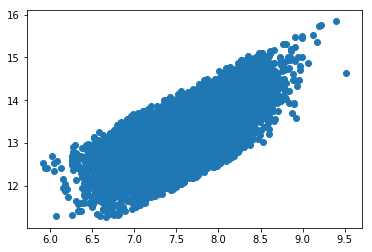

In [72]:
#log-log scatter plot
plt.scatter(df['log_sqft_living'], df['log_price']);

## Post log transformation
- HELL YEAH! better, and normalized our outliers

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_living15,sqft_lot15,bed_bath_sum,renovation_yes,sqft_living_plus_lot,sqft_living_plus_lot_15,lat_long,distance_from_flatiron,log_price,log_sqft_living
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1340,5650,4.00,0,6830,6990,"(47.5112, -122.257)",7.714868,12.309982,7.073270
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1690,7639,5.25,1,9812,9329,"(47.721, -122.319)",7.766476,13.195614,7.851661
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,2720,8062,3.00,0,10770,10782,"(47.7379, -122.233)",10.107949,12.100712,6.646391
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1360,5000,7.00,0,6960,6360,"(47.5208, -122.393)",6.655340,13.311329,7.580700
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1800,7503,5.00,0,9760,9303,"(47.6168, -122.045)",13.578402,13.142166,7.426549


In [75]:
X = df[['log_sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'distance_from_flatiron']]
y = df['log_price']

In [76]:
predictors = np.asarray(X) #set predictors as numpy array of capital X
predictors_int = sm.add_constant(predictors) #.add_constant
model = sm.OLS(y,predictors_int).fit() #statsmodels.OrdinaryLeastSquares (dependent var, array of predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     8508.
Date:                Tue, 16 Apr 2019   Prob (F-statistic):               0.00
Time:                        16:24:01   Log-Likelihood:                -2494.3
No. Observations:               21597   AIC:                             5005.
Df Residuals:                   21589   BIC:                             5068.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.5330      0.063    151.710      0.000       9.410       9.656
x1             0.3383      0.010     35.563      0.000       0.320       0.357
x2             0.1216      0.003     43.848      0.000       0.116       0.127
x3           6.14e-05    4.6e-06     13.335      0.000    5.24e-05    7.04e-05
x4             0.0001   4.48e-06     29.675      0.000       0.000       0.000
x5             0.0086      0.004      2.244      0.025       0.001       0.016
x6             0.0774      0.003     30.201      0.000       0.072       0.082
x7            -0.0329      0.000   -113.452      0.000      -0.034      -0.032
==============================================================================
Omnibus:                      218.638   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.405
Skew:                          -0.052   Prob(JB):                     5.48e-79
Kurtosis:                       3.624   Cond. No.                     9.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
""" Now using Sklearn"""
ss = StandardScaler()

X_scaled = ss.fit_transform(X)

np.random.seed(33)

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y)

/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/krex/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [78]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
lr.score(X_test,y_test)

0.7427999444678035

In [80]:
lr.coef_

array([ 0.14177646,  0.14267965,  0.05213202,  0.09306623,  0.0057103 ,
        0.05781633, -0.22140015])

In [81]:
r_2 = metrics.r2_score(y_test, lr.predict(X_test))
vif = 1/(1-r_2)
mae = metrics.mean_absolute_error(y_test, lr.predict(X_test))
mse = metrics.mean_squared_error(y_test, lr.predict(X_test))


In [82]:
#PRICE vs. TOP 6 BENCHMARK #test size is .25
print(f'Our list of predictors: {X.columns}')
print(f"The R-squared score of our test is {r_2}")
print(f"The MAE score of our test is {mae}")
print(f"The MSE score of our test is {mse}")
print(f"The RMSE score of our test is ${sqrt(mse)}")

Our list of predictors: Index(['log_sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms',
       'view', 'distance_from_flatiron'],
      dtype='object')
The R-squared score of our test is 0.7427999444678035
The MAE score of our test is 0.2107767565688415
The MSE score of our test is 0.07222116741707728
The RMSE score of our test is $0.26873996244897647


In [98]:
r = np.log(122)

In [99]:
np.exp(r)

122.00000000000003